In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the original dataset
data = pd.read_csv('Plomo_pos')  # CSV

# Filter relevant columns
filtered_data = data[['Event', 'Particula', 'Px', 'Py', 'Pz', 'Carga']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=2) 
labels = dbscan.fit_predict(X_scaled)

# Get the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) 

print(f'Found {n_clusters} clusters.')

# Add cluster labels to the original DataFrame
filtered_data['Cluster'] = labels

# Save the DataFrame with selected columns and cluster labels to a CSV file
filtered_data.to_csv('PB-POS-C3.csv', index=False)

print("CSV file successfully saved with selected columns and cluster labels.")


Found 3563 clusters.


C:\Users\estef\AppData\Local\Temp\ipykernel_37600\1156695857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = labels


CSV file successfully saved with selected columns and cluster labels.


Number of data points analyzed by DBSCAN: 145996


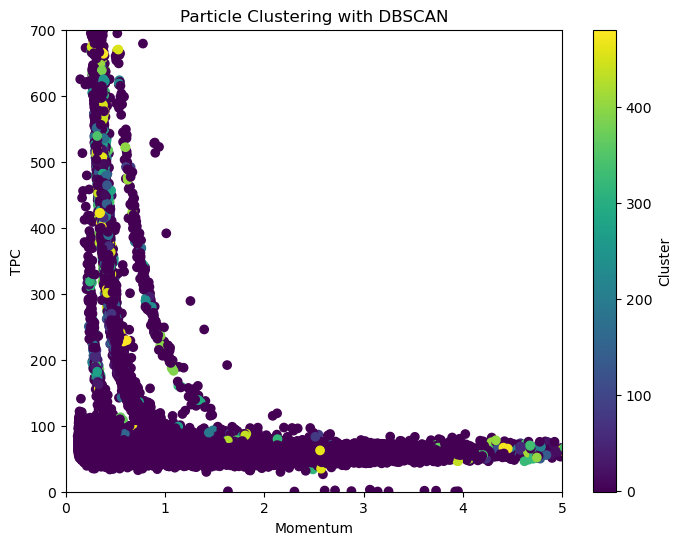

In [5]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Plomo_pos')  # CSV file

# Filter the data
filtered_data = data[['TPC', 'Momento', 'ITS']]

# Select relevant columns (TPC and Momentum) after filtering
X = filtered_data

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=2)  
dbscan.fit(X_scaled)

# Get the indices of the samples considered core
core_indices = dbscan.core_sample_indices_

# Calculate the number of data points being analyzed
cantidad_datos = len(core_indices)
print("Number of data points analyzed by DBSCAN:", cantidad_datos)

# Get the cluster labels
labels = dbscan.labels_

# Visualize the results
plt.figure(figsize=(8, 6))

# Scatter plot of the data
plt.scatter(X['Momento'], X['TPC'], c=labels, cmap='viridis')

plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.title('Particle Clustering with DBSCAN')
plt.colorbar(label='Cluster')

plt.xlim(0, 5)
plt.ylim(0, 700)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


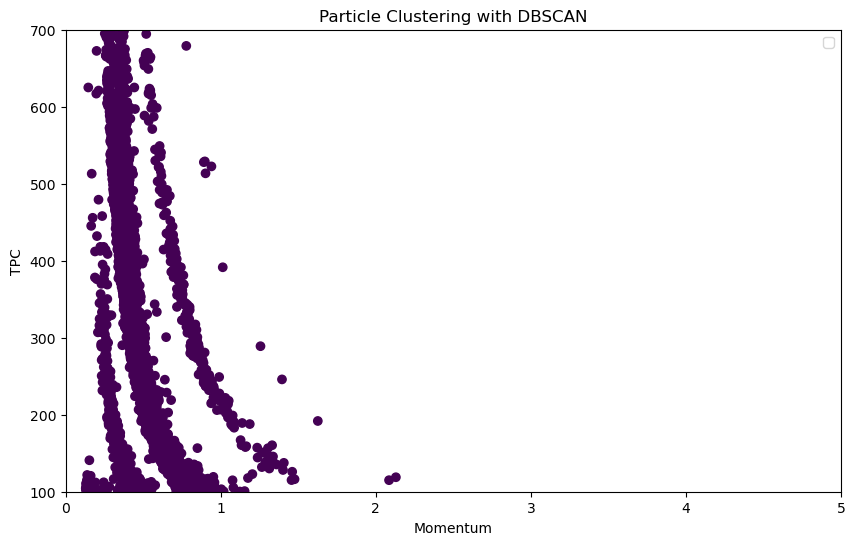

In [7]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Plomo_pos')  

# Filter the data
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(filtered_data[['Momento', 'TPC']])  

# Apply DBSCAN
dbscan = DBSCAN(eps=5.75, min_samples=3).fit(X)  

# Get the cluster labels
labels = dbscan.labels_

# Visualize the results
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(filtered_data['Momento'], filtered_data['TPC'], c=labels, cmap='viridis')

plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.title('Particle Clustering with DBSCAN')
plt.legend()

plt.xlim(0, 5)
plt.ylim(100, 700)

plt.show()


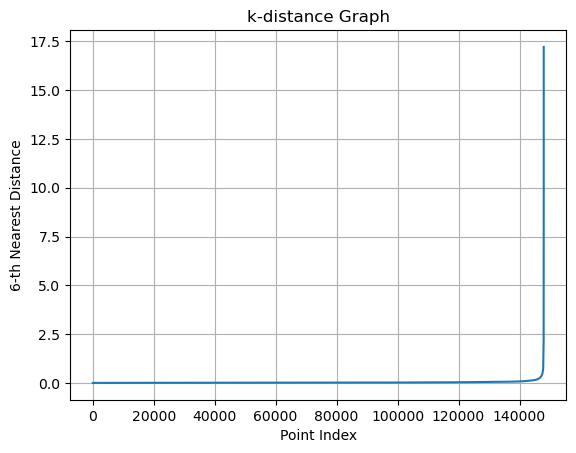

Approximate value of eps: 8.574991736063133
Approximate value of min_samples: 4


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load the dataset
data = pd.read_csv('Plomo_pos')  # CSV

# Filter the data 
filtered_data = data[['TPC', 'Momento', 'ITS']]

# Select relevant columns (TPC and Momentum) after filtering
X1 = filtered_data

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X1)  

# Calculate the distances to the k-th nearest neighbors
k = 6  # Clusters
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)  # k + 1 because the point itself is included in the nearest neighbors
distances, indices = nbrs.kneighbors(X)

# Sort the distances in ascending order
k_distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.plot(np.arange(len(k_distances)), k_distances)
plt.title('k-distance Graph')
plt.xlabel('Point Index')
plt.ylabel(f'{k}-th Nearest Distance')
plt.grid(True)
plt.show()

# Find the point where the rate of change of distance starts to decrease
diff = np.diff(k_distances, 2)  # Second-order difference
eps_index = np.where(diff == max(diff))[0][0]

# Calculate the approximate value of eps
eps_approx = k_distances[eps_index]

# Calculate the approximate value of min_samples (dimensionality of the data + 1)
min_samples_approx = X.shape[1] + 1

print(f'Approximate value of eps: {eps_approx}')
print(f'Approximate value of min_samples: {min_samples_approx}')


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the original dataset
data = pd.read_csv('Plomo_neg')  # CSV

# Filter relevant columns
filtered_data = data[['Event', 'Particula', 'Px', 'Py', 'Pz', 'Carga']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=2)  
labels = dbscan.fit_predict(X_scaled)

# Get the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 if there are noise points (-1)

print(f'Found {n_clusters} clusters.')

# Add cluster labels to the original DataFrame
filtered_data['Cluster'] = labels

# Save the DataFrame with selected columns and cluster labels to a CSV file
filtered_data.to_csv('PB-NEG-C3.csv', index=False)

print("CSV file successfully saved with selected columns and cluster labels.")


Se encontraron 9229 clusters.


C:\Users\estef\AppData\Local\Temp\ipykernel_26432\3825036282.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = labels


Archivo CSV guardado exitosamente con las columnas seleccionadas y las etiquetas de los clusters.


Number of data points analyzed by DBSCAN: 135661


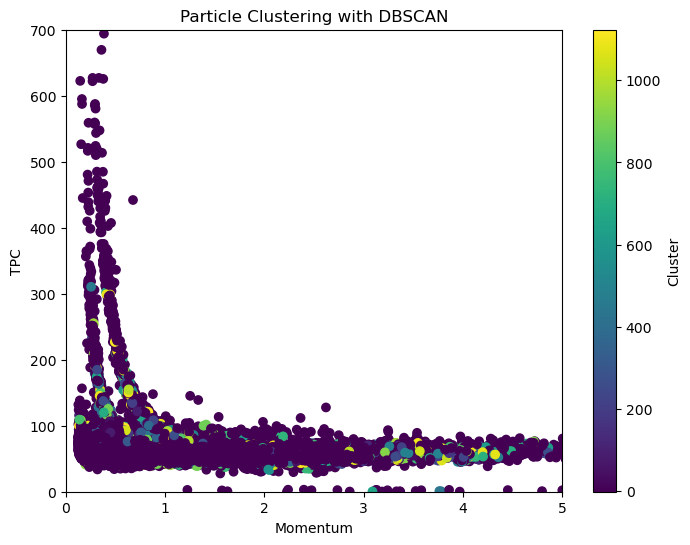

In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Plomo_neg')  # CSV file

# Filter the data
filtered_data = data[['TPC', 'Momento', 'ITS']]

# Select relevant columns (TPC and Momentum) after filtering
X = filtered_data

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=2)  
dbscan.fit(X_scaled)

# Get the indices of the samples considered core
core_indices = dbscan.core_sample_indices_

# Calculate the number of data points being analyzed
cantidad_datos = len(core_indices)
print("Number of data points analyzed by DBSCAN:", cantidad_datos)

# Get the cluster labels
labels = dbscan.labels_

# Visualize the results
plt.figure(figsize=(8, 6))

# Scatter plot of the data
plt.scatter(X['Momento'], X['TPC'], c=labels, cmap='viridis')

plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.title('Particle Clustering with DBSCAN')
plt.colorbar(label='Cluster')

plt.xlim(0, 5)
plt.ylim(0, 700)

plt.show()


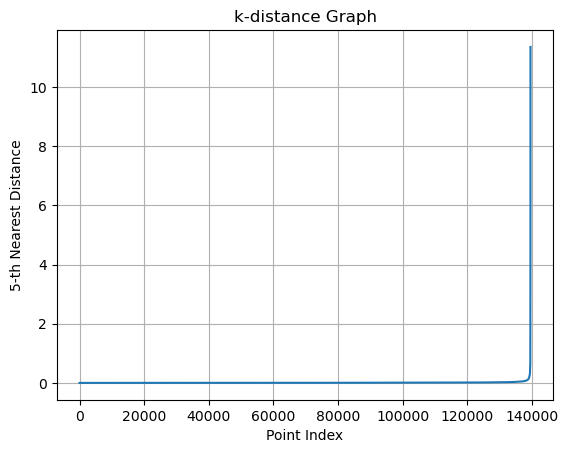

Approximate value of eps: 6.0424507946273724
Approximate value of min_samples: 3


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv('Plomo_neg')  # CSV file

# Filter the data 
filtered_data = data[['TPC', 'Momento']]
X1 = filtered_data[['TPC', 'Momento']]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X1)  

# Calculate the distances to the k-th nearest neighbors
k = 5  # Clusters
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)  # k + 1 because the point itself is included in the nearest neighbors
distances, indices = nbrs.kneighbors(X)

# Sort the distances in ascending order
k_distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.plot(np.arange(len(k_distances)), k_distances)
plt.title('k-distance Graph')
plt.xlabel('Point Index')
plt.ylabel(f'{k}-th Nearest Distance')
plt.grid(True)
plt.show()

# Find the point where the rate of change of distance starts to decrease
diff = np.diff(k_distances, 2)  # Second-order difference
eps_index = np.where(diff == max(diff))[0][0]

# Calculate the approximate value of eps
eps_approx = k_distances[eps_index]

# Calculate the approximate value of min_samples ( the dimensionality of the data + 1)
min_samples_approx = X.shape[1] + 1

print(f'Approximate value of eps: {eps_approx}')
print(f'Approximate value of min_samples: {min_samples_approx}')
